In [17]:
train_path = '/content/drive/MyDrive/DL project /CNN/xray_dataset_covid19/train'
valid_path = '/content/drive/MyDrive/DL project /CNN/xray_dataset_covid19/test'

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [20]:
img=tf.keras.utils.load_img("/content/drive/MyDrive/DL Datasets/CNN/xray_dataset_covid19/train/Lung _Inflamated/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg")

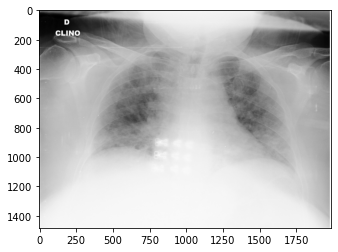

In [21]:
plt.imshow(img)

In [22]:
import cv2

In [23]:
cv2.imread("/content/drive/MyDrive/DL Datasets/CNN/xray_dataset_covid19/train/Lung _Inflamated/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg")

array([[[182, 182, 182],
        [169, 169, 169],
        [152, 152, 152],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[165, 165, 165],
        [150, 150, 150],
        [138, 138, 138],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[146, 146, 146],
        [134, 134, 134],
        [128, 128, 128],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[243, 243, 243],
        [244, 244, 244],
        [245, 245, 245],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [24]:
cv2.imread("/content/drive/MyDrive/DL Datasets/CNN/xray_dataset_covid19/train/Lung _Inflamated/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg").shape

(1482, 1989, 3)

In [25]:
train_datagen=image.ImageDataGenerator(
    rescale=0.1/255,
    )
test_dataset=image.ImageDataGenerator(
    rescale=0.1/255,
    )


In [26]:
train_set=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DL Datasets/CNN/xray_dataset_covid19/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 148 images belonging to 2 classes.


In [27]:
train_set.class_indices

{'Lung _Inflamated': 0, 'Lung_Not_Inflamated': 1}

In [28]:
train_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [29]:
test_set=test_dataset.flow_from_directory(
    '/content/drive/MyDrive/DL Datasets/CNN/xray_dataset_covid19/test',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 40 images belonging to 2 classes.


In [30]:
#CNN based model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',
              loss=keras.losses.binary_crossentropy, 
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [32]:
c=model.fit_generator(
    train_set,
    epochs=10,
    validation_data=test_set

)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
5/5 [==============================] - 38s 9s/step - loss: 0.6968 - accuracy: 0.5270 - val_loss: 0.6729 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 6s 1s/step - loss: 0.6047 - accuracy: 0.6554 - val_loss: 0.6336 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 6s 1s/step - loss: 0.4479 - accuracy: 0.7703 - val_loss: 0.1828 - val_accuracy: 0.9750
Epoch 4/10
5/5 [==============================] - 6s 1s/step - loss: 0.2184 - accuracy: 0.9122 - val_loss: 0.1613 - val_accuracy: 0.9750
Epoch 5/10
5/5 [==============================] - 6s 1s/step - loss: 0.2396 - accuracy: 0.9122 - val_loss: 0.2984 - val_accuracy: 0.9250
Epoch 6/10
5/5 [==============================] - 6s 1s/step - loss: 0.2075 - accuracy: 0.9324 - val_loss: 0.1861 - val_accuracy: 0.9250
Epoch 7/10
5/5 [==============================] - 6s 1s/step - loss: 0.2045 - accuracy: 0.9459 - val_loss: 0.0986 - val_accuracy: 0.9500
Epoch 8/10
5/5 [========================

In [36]:
import os
from keras.utils import load_img, img_to_array

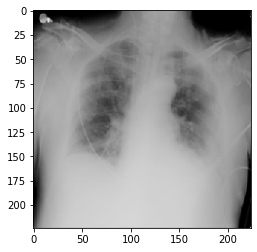

1/1 [==============================] - 0s 16ms/step
[[0.]]
Lung Inflamated


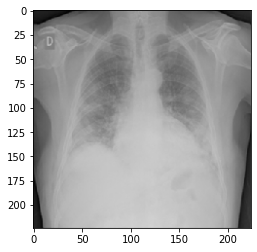

1/1 [==============================] - 0s 22ms/step
[[0.]]
Lung Inflamated


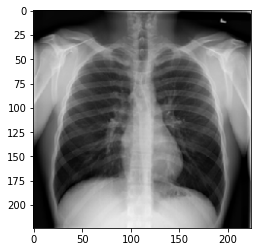

1/1 [==============================] - 0s 19ms/step
[[1.]]
Normal


In [38]:
dir_path='/content/drive/MyDrive/DL Datasets/CNN/xray_dataset_covid19/test_1'
for i in os.listdir(dir_path):
  img=tf.keras.utils.load_img(dir_path+'//'+i,target_size=(224,224))
  plt.imshow(img)
  plt.show()

  X=img_to_array(img)
  #X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images=np.vstack([X])
  val=model.predict(images)
  print(val)

  if val==0:
    print("Lung Inflamated")
  else:
    print("Normal")
